## Séries Temporais

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

df_flights = sns.load_dataset('flights')
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df_flights.index = pd.date_range(start='1949-01', periods=df_flights.shape[0], freq='M', )

In [5]:
df_flights.drop(['year', 'month'], axis=1, inplace=True)

<Axes: >

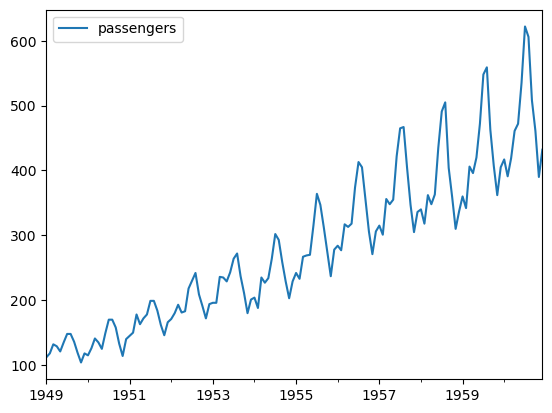

In [6]:
df_flights.plot()

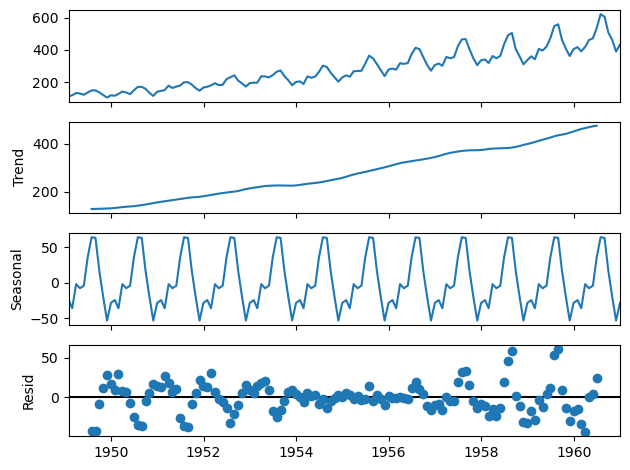

In [7]:
decomp = seasonal_decompose(df_flights)
decomp.plot();

<Axes: >

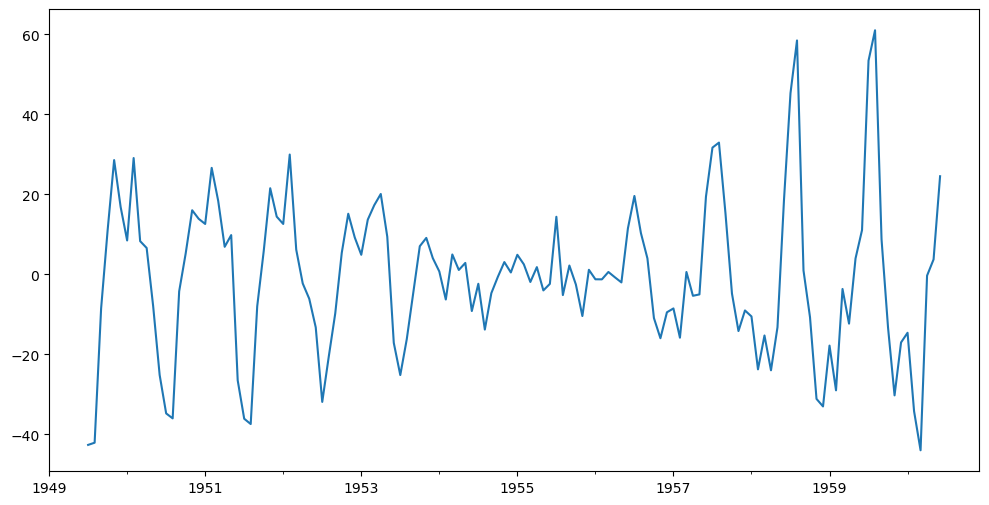

In [8]:
decomp.resid.plot(figsize=(12, 6))

<Axes: >

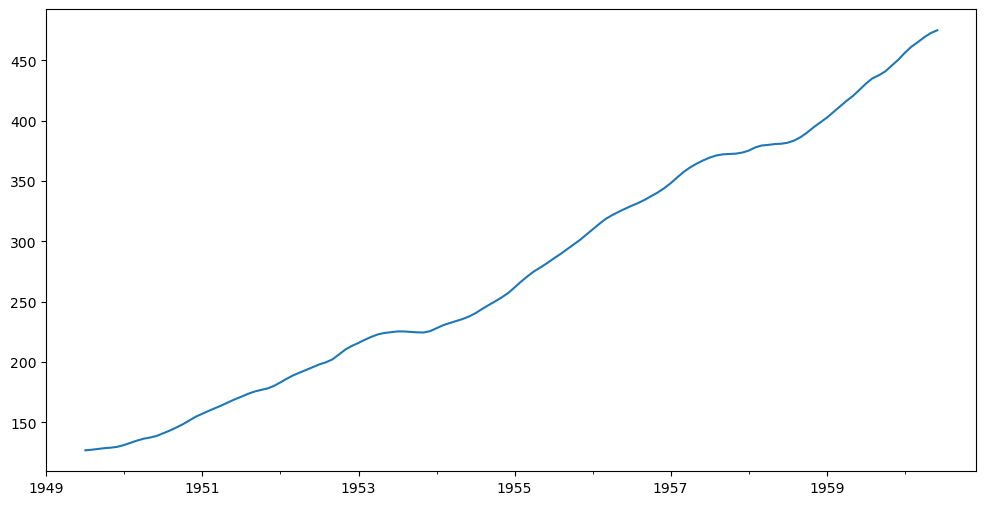

In [9]:
decomp.trend.plot(figsize=(12, 6))

[*********************100%%**********************]  1 of 1 completed

18:41:02 - cmdstanpy - INFO - Chain [1] start processing


18:41:02 - cmdstanpy - INFO - Chain [1] done processing


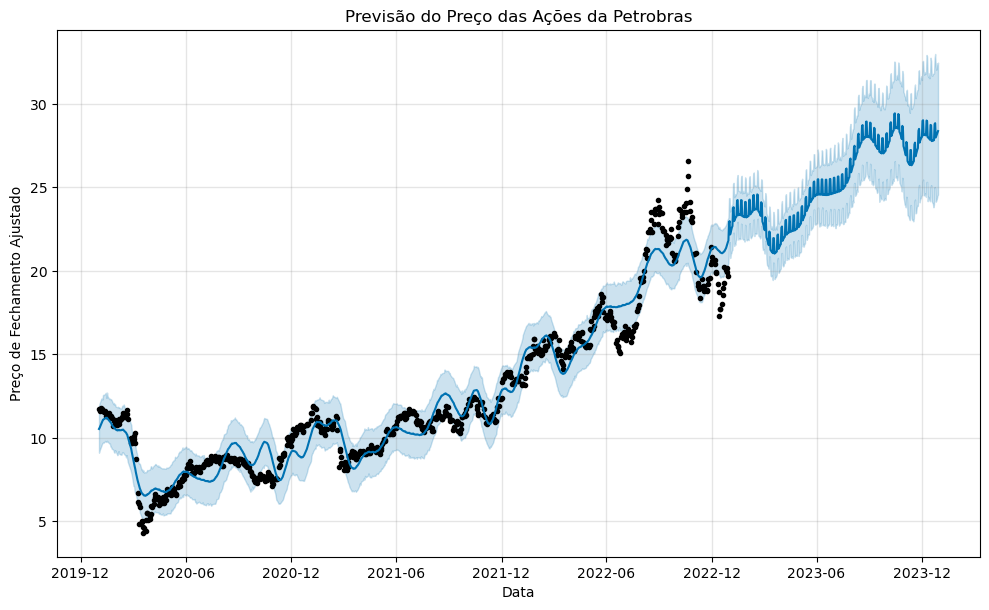

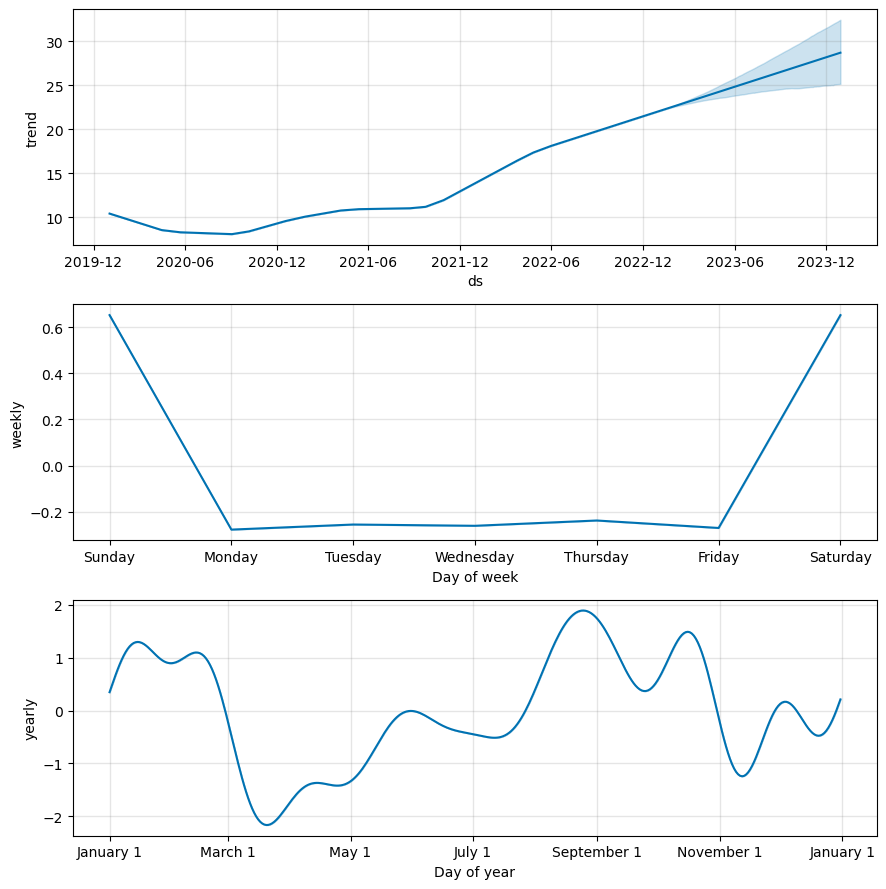

In [1]:
import yfinance as yf
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Defina o período de tempo para coletar os dados
start_date = '2020-01-01'
end_date = '2023-01-01'

# Use o yfinance para obter os dados de preços das ações da Petrobras
petrobras = yf.download('PETR4.SA', start=start_date, end=end_date)

# Renomeie as colunas para 'ds' e 'y' (necessárias pelo Prophet)
petrobras = petrobras.reset_index()
petrobras = petrobras[['Date', 'Adj Close']]
petrobras = petrobras.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

# Crie um modelo Prophet
model = Prophet()

# Ajuste o modelo aos dados
model.fit(petrobras)

# Crie um DataFrame para fazer previsões futuras
future = model.make_future_dataframe(periods=365)  # Previsão para o próximo ano

# Realize a previsão
forecast = model.predict(future)

# Visualize os resultados
fig = model.plot(forecast)
plt.title("Previsão do Preço das Ações da Petrobras")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento Ajustado")
plt.show()


fig = model.plot_components(forecast)
plt.show()